In [1]:
import timeit
from timeit import Timer
import matplotlib.pyplot as plt
import pandas as pd 

In [2]:
class ArrayStack:

    def __init__ (self):
        self._data = [ ] # nonpublic list instance

    def __len__ (self):
        return len(self._data)

    def is_empty(self):
        return len(self._data) == 0

    def push(self, e):
        self._data.append(e) # new item stored at end of list

    def top(self):
        if self.is_empty( ):
            raise Exception(' Stack is empty ')
        return self._data[-1] # the last item in the list

    def pop(self):
        if self.is_empty( ):
            raise Exception(' Stack is empty ')
        return self._data.pop( ) # remove last item from list

In [3]:
class ArrayQueue:
    
    DEFAULT_CAPACITY = 10
    
    def __init__(self):
        self._data = [None] * ArrayQueue.DEFAULT_CAPACITY
        self._size = 0
        self._front = 0
        
    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def first(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        return self._data[self._front]

    def dequeue(self):
        if self.is_empty():
            raise Empty('Queue is empty')
        answer = self._data[self._front]
        self._data[self._front] = None
        self._front = (self._front + 1) % len(self._data)
        self._size -= 1
        return answer

    def enqueue(self, e):
        if self._size == len(self._data):
            self._resize(2 * len(self._data))
        avail = (self._front + self._size) % len(self._data)
        self._data[avail] = e
        self._size += 1

    def _resize(self, cap):
        old = self._data
        self._data = [None] * cap
        walk = self._front
        for k in range(self._size):
            self._data[k] = old[walk]
            walk = (1 + walk) % len(old)
        self._front = 0

# push and enqueue

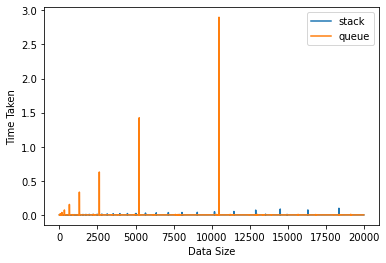

In [4]:
stl = ArrayStack()
stl_time = []
ql = ArrayQueue()
ql_time = []
data = []

for i in range(1,20000):
    x = Timer(lambda: stl.push(i),'from __main__ import stl')
    y = Timer(lambda: ql.enqueue(i),'from __main__ import ql')
    data.append(i)
    stl_time.append(x.timeit(number=1000))
    ql_time.append(y.timeit(number=1000))

plt.plot(data,stl_time,label='stack')
plt.plot(data,ql_time,label='queue')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.legend()
plt.show()

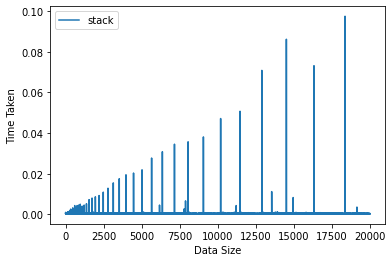

In [7]:
plt.plot(data,stl_time,label='stack')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.legend()
plt.show()

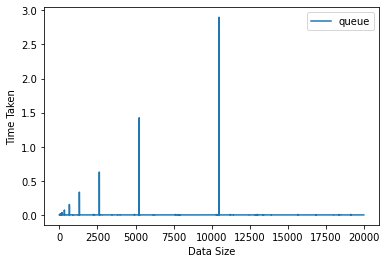

In [8]:
plt.plot(data,ql_time,label='queue')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.legend()
plt.show()

In [9]:
display = list(zip(data, stl_time, ql_time))
df1 = pd.DataFrame(display, columns =  ['stl', 'Stack-Time','Queue-Time'])
pd.set_option("display.max_rows",None,"display.max_columns",None)
print(df1)

         stl  Stack-Time  Queue-Time
0          1    0.000533    0.000955
1          2    0.000458    0.002068
2          3    0.000556    0.002436
3          4    0.000463    0.001307
4          5    0.000251    0.000582
5          6    0.000215    0.002414
6          7    0.000491    0.001142
7          8    0.000341    0.000878
8          9    0.000191    0.000730
9         10    0.000313    0.001308
10        11    0.000431    0.005241
11        12    0.000189    0.000800
12        13    0.000967    0.001166
13        14    0.000444    0.000685
14        15    0.000183    0.000521
15        16    0.000199    0.000659
16        17    0.000187    0.000765
17        18    0.000293    0.000587
18        19    0.000445    0.000897
19        20    0.000190    0.000523
20        21    0.000187    0.006387
21        22    0.000189    0.000520
22        23    0.000184    0.000530
23        24    0.000234    0.000996
24        25    0.000386    0.001428
25        26    0.000548    0.001058
2

# pop and dequeue

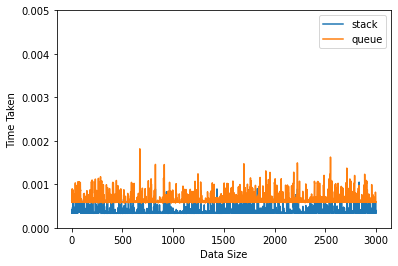

In [9]:
stl = ArrayStack()
stl_time = []
ql = ArrayQueue()
ql_time = []
data = []

for i in range(1,3000000):
    ql.enqueue(i)
    stl.push(i)
    
for i in range(1,3000):
    x = Timer(lambda: stl.pop(),'from __main__ import stl')
    y = Timer(lambda: ql.dequeue(),'from __main__ import ql')
    data.append(i)
    stl_time.append(x.timeit(number=1000))
    ql_time.append(y.timeit(number=1000))

plt.plot(data,stl_time,label='stack')
plt.plot(data,ql_time,label='queue')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

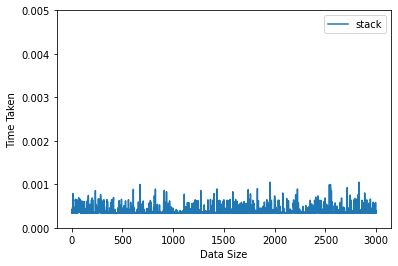

In [10]:
plt.plot(data,stl_time,label='stack')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

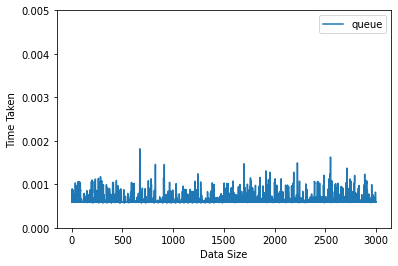

In [11]:
plt.plot(data,ql_time,label='queue')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

In [12]:
display = list(zip(data, stl_time, ql_time))
df1 = pd.DataFrame(display, columns =  ['stl', 'Stack-Time','Queue-Time'])
pd.set_option("display.max_rows",None,"display.max_columns",None)
print(df1)

       stl  Stack-Time  Queue-Time
0        1    0.000346    0.000615
1        2    0.000367    0.000607
2        3    0.000356    0.000584
3        4    0.000337    0.000583
4        5    0.000346    0.000896
5        6    0.000432    0.000587
6        7    0.000339    0.000599
7        8    0.000340    0.000588
8        9    0.000474    0.000607
9       10    0.000335    0.000600
10      11    0.000338    0.000589
11      12    0.000787    0.000874
12      13    0.000346    0.000617
13      14    0.000341    0.000588
14      15    0.000340    0.000586
15      16    0.000341    0.000585
16      17    0.000342    0.000586
17      18    0.000347    0.000595
18      19    0.000334    0.000666
19      20    0.000347    0.000780
20      21    0.000441    0.000592
21      22    0.000340    0.000590
22      23    0.000350    0.000591
23      24    0.000336    0.000591
24      25    0.000336    0.000590
25      26    0.000342    0.000595
26      27    0.000337    0.000595
27      28    0.0003

# top and first

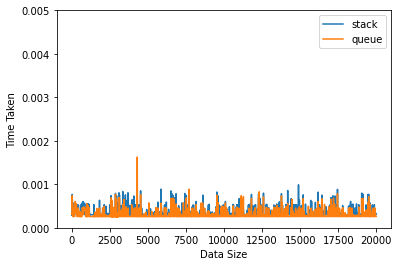

In [15]:
stl = ArrayStack()
stl_time = []
ql = ArrayQueue()
ql_time = []
data = []
    
for j in range(1,20000,10):
    for i in range(j):
        stl.push(i)
        ql.enqueue(i)
    x = Timer(lambda: stl.top(),'from __main__ import stl')
    y = Timer(lambda: ql.first(),'from __main__ import ql')
    data.append(i)
    stl_time.append(x.timeit(number=1000))
    ql_time.append(y.timeit(number=1000))

plt.plot(data,stl_time,label='stack')
plt.plot(data,ql_time,label='queue')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

In [16]:
plt.plot(data,stl_time,label='stack')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

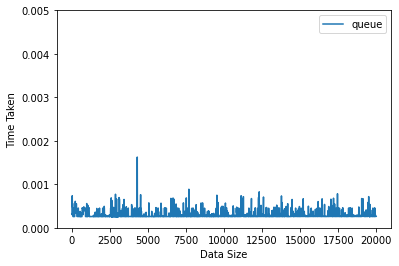

In [17]:
plt.plot(data,ql_time,label='queue')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

In [18]:
display = list(zip(data, stl_time, ql_time))
df1 = pd.DataFrame(display, columns =  ['stl', 'Stack-Time','Queue-Time'])
pd.set_option("display.max_rows",None,"display.max_columns",None)
print(df1)

        stl  Stack-Time  Queue-Time
0         0    0.000292    0.000320
1        10    0.000286    0.000303
2        20    0.000668    0.000635
3        30    0.000767    0.000737
4        40    0.000455    0.000479
5        50    0.000529    0.000562
6        60    0.000545    0.000359
7        70    0.000448    0.000261
8        80    0.000302    0.000259
9        90    0.000301    0.000259
10      100    0.000303    0.000257
11      110    0.000302    0.000259
12      120    0.000299    0.000260
13      130    0.000300    0.000259
14      140    0.000568    0.000462
15      150    0.000302    0.000262
16      160    0.000301    0.000260
17      170    0.000302    0.000259
18      180    0.000300    0.000259
19      190    0.000302    0.000258
20      200    0.000301    0.000428
21      210    0.000536    0.000449
22      220    0.000526    0.000456
23      230    0.000391    0.000609
24      240    0.000535    0.000345
25      250    0.000529    0.000452
26      260    0.000529    0

# len

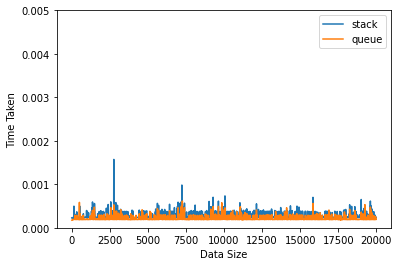

In [19]:
stl = ArrayStack()
stl_time = []
ql = ArrayQueue()
ql_time = []
data = []

for j in range(1,20000,10):
    for i in range(j):
        stl.push(i)
        ql.enqueue(i)  
    x = Timer(lambda: len(stl),'from __main__ import stl')
    y = Timer(lambda: len(ql),'from __main__ import ql')
    data.append(i)
    stl_time.append(x.timeit(number=1000))
    ql_time.append(y.timeit(number=1000))
    
plt.plot(data,stl_time,label='stack')
plt.plot(data,ql_time,label='queue')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

In [20]:
plt.plot(data,stl_time,label='stack')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

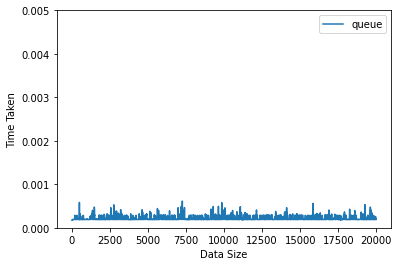

In [21]:
plt.plot(data,ql_time,label='queue')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

In [22]:
display = list(zip(data, stl_time, ql_time))
df1 = pd.DataFrame(display, columns =  ['stl', 'Stack-Time','Queue-Time'])
pd.set_option("display.max_rows",None,"display.max_columns",None)
print(df1)

        stl  Stack-Time  Queue-Time
0         0    0.000229    0.000177
1        10    0.000222    0.000179
2        20    0.000222    0.000178
3        30    0.000221    0.000176
4        40    0.000225    0.000176
5        50    0.000221    0.000175
6        60    0.000209    0.000176
7        70    0.000235    0.000197
8        80    0.000235    0.000194
9        90    0.000239    0.000192
10      100    0.000234    0.000193
11      110    0.000235    0.000195
12      120    0.000238    0.000192
13      130    0.000235    0.000192
14      140    0.000498    0.000195
15      150    0.000285    0.000194
16      160    0.000237    0.000193
17      170    0.000237    0.000196
18      180    0.000235    0.000193
19      190    0.000235    0.000194
20      200    0.000314    0.000289
21      210    0.000245    0.000208
22      220    0.000235    0.000193
23      230    0.000235    0.000231
24      240    0.000235    0.000192
25      250    0.000260    0.000193
26      260    0.000235    0

# is_empty

In [23]:
stl = ArrayStack()
stl_time = []
ql = ArrayQueue()
ql_time = []
data = []

for j in range(1,20000,10):
    for i in range(j):
        stl.push(i)
        ql.enqueue(i)
    x = Timer(lambda: stl.is_empty() ,'from __main__ import stl')
    y = Timer(lambda: ql.is_empty(),'from __main__ import ql')
    data.append(i)
    stl_time.append(x.timeit(number=1000))
    ql_time.append(y.timeit(number=1000))

plt.plot(data,stl_time,label='stack')
plt.plot(data,ql_time,label='queue')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

In [24]:
plt.plot(data,stl_time,label='stack')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

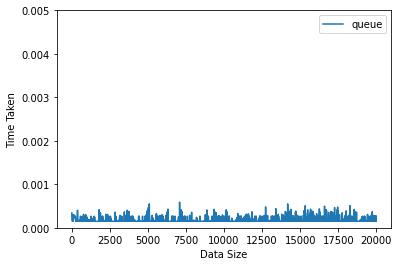

In [25]:
plt.plot(data,ql_time,label='queue')
plt.ylabel('Time Taken')
plt.xlabel('Data Size')
plt.ylim(0,0.005)
plt.legend()
plt.show()

In [26]:
display = list(zip(data, stl_time, ql_time))
df1 = pd.DataFrame(display, columns =  ['stl', 'Stack-Time','Queue-Time'])
pd.set_option("display.max_rows",None,"display.max_columns",None)
print(df1)

        stl  Stack-Time  Queue-Time
0         0    0.000190    0.000341
1        10    0.000211    0.000178
2        20    0.000210    0.000159
3        30    0.000205    0.000154
4        40    0.000188    0.000150
5        50    0.000190    0.000150
6        60    0.000188    0.000150
7        70    0.000204    0.000309
8        80    0.000326    0.000160
9        90    0.000204    0.000156
10      100    0.000308    0.000297
11      110    0.000377    0.000266
12      120    0.000348    0.000266
13      130    0.000203    0.000216
14      140    0.000343    0.000271
15      150    0.000342    0.000268
16      160    0.000341    0.000270
17      170    0.000343    0.000291
18      180    0.000341    0.000272
19      190    0.000341    0.000270
20      200    0.000342    0.000270
21      210    0.000341    0.000267
22      220    0.000341    0.000266
23      230    0.000423    0.000265
24      240    0.000377    0.000267
25      250    0.000204    0.000151
26      260    0.000217    0